In [165]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
clr = pd.read_csv('candidates_eda.csv')
del clr['Unnamed: 0']
clr

,Name,Party,State,District Number,Incumbent Status,Winner Status,Percentage of Vote,Total Amount Raised,Total Amount Spent,State_District
0,Jerry Carl,(R),AL,1,N/a,Winner,64.9,1971321,1859349,AL01
1,James Averhart,(D),AL,1,N/a,N/a,35.0,80095,78973,AL01
2,Barry Moore,(R),AL,2,N/a,Winner,65.3,650807,669368,AL02
3,Phyllis Harvey-Hall,(D),AL,2,N/a,N/a,34.6,56050,55988,AL02
4,Mike D Rogers,(R),AL,3,Incumbent,Winner,67.5,1193111,1218564,AL03
...,...,...,...,...,...,...,...,...,...,...
890,Liz Cheney,(R),WY,1,Incumbent,Winner,68.6,3003883,3060167,WY01
891,Lynnette Grey Bull,(D),WY,1,N/a,N/a,24.6,134597,132235,WY01
892,Eleanor Holmes Norton,(D),DC,0,Incumbent,Winner,86.3,386989,358925,DC00
893,Barbara Washington Franklin,(I),DC,0,N/a,N/a,0.0,14070,16530,DC00


In [82]:
clr.columns = ['Name', 'Party', 'State', 'District_Number', 'Incumbent_Status', 'Winner_Status', 'Vote_Percentage', 'total_raised', 'total_spent', 'State_District']
clr

,Name,Party,State,District_Number,Incumbent_Status,Winner_Status,Vote_Percentage,total_raised,total_spent,State_District
0,Jerry Carl,(R),AL,1,N/a,Winner,64.9,1971321,1859349,AL01
1,James Averhart,(D),AL,1,N/a,N/a,35.0,80095,78973,AL01
2,Barry Moore,(R),AL,2,N/a,Winner,65.3,650807,669368,AL02
3,Phyllis Harvey-Hall,(D),AL,2,N/a,N/a,34.6,56050,55988,AL02
4,Mike D Rogers,(R),AL,3,Incumbent,Winner,67.5,1193111,1218564,AL03
...,...,...,...,...,...,...,...,...,...,...
890,Liz Cheney,(R),WY,1,Incumbent,Winner,68.6,3003883,3060167,WY01
891,Lynnette Grey Bull,(D),WY,1,N/a,N/a,24.6,134597,132235,WY01
892,Eleanor Holmes Norton,(D),DC,0,Incumbent,Winner,86.3,386989,358925,DC00
893,Barbara Washington Franklin,(I),DC,0,N/a,N/a,0.0,14070,16530,DC00


In [83]:
# Change incumbent status, winner status and party to binary
clr.Incumbent_Status[clr.Incumbent_Status == 'Incumbent'] = 1
clr.Incumbent_Status[clr.Incumbent_Status == 'N/a'] = 0
clr.Winner_Status[clr.Winner_Status == 'Winner'] = 1
clr.Winner_Status[clr.Winner_Status == 'N/a'] = 0
clr.Party[clr.Party == '(R)'] = 1
clr.Party[clr.Party == '(D)'] = 0
clr = clr[~clr['Party'].isin(['(I)', '(3)', '(L)'])]
clr["Incumbent_Status"] = pd.to_numeric(clr["Incumbent_Status"])
clr["Winner_Status"] = pd.to_numeric(clr["Winner_Status"])
clr["Party"] = pd.to_numeric(clr["Party"])
clr

/var/folders/y2/1hbr5nhn5g74yh6sf24m5s9xr861g0/T/ipykernel_27709/1820178222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clr.Incumbent_Status[clr.Incumbent_Status == 'Incumbent'] = 1
/var/folders/y2/1hbr5nhn5g74yh6sf24m5s9xr861g0/T/ipykernel_27709/1820178222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clr.Incumbent_Status[clr.Incumbent_Status == 'N/a'] = 0
/var/folders/y2/1hbr5nhn5g74yh6sf24m5s9xr861g0/T/ipykernel_27709/1820178222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Name,Party,State,District_Number,Incumbent_Status,Winner_Status,Vote_Percentage,total_raised,total_spent,State_District
0,Jerry Carl,1,AL,1,0,1,64.9,1971321,1859349,AL01
1,James Averhart,0,AL,1,0,0,35.0,80095,78973,AL01
2,Barry Moore,1,AL,2,0,1,65.3,650807,669368,AL02
3,Phyllis Harvey-Hall,0,AL,2,0,0,34.6,56050,55988,AL02
4,Mike D Rogers,1,AL,3,1,1,67.5,1193111,1218564,AL03
...,...,...,...,...,...,...,...,...,...,...
888,Mike Gallagher,1,WI,8,1,1,64.0,3202905,2841801,WI08
889,Amanda Stuck,0,WI,8,0,0,36.0,416978,399916,WI08
890,Liz Cheney,1,WY,1,1,1,68.6,3003883,3060167,WY01
891,Lynnette Grey Bull,0,WY,1,0,0,24.6,134597,132235,WY01


In [119]:
# Calculate total spending by district and percentage spent by candidate
clr['dis_total_spent'] = clr.groupby('State_District')['total_spent'].transform('sum')
clr['spent_pct'] = 100 * clr['total_spent'] / clr['dis_total_spent'] 
clr

/var/folders/y2/1hbr5nhn5g74yh6sf24m5s9xr861g0/T/ipykernel_27709/1420349688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clr['dis_total_spent'] = clr.groupby('State_District')['total_spent'].transform('sum')
/var/folders/y2/1hbr5nhn5g74yh6sf24m5s9xr861g0/T/ipykernel_27709/1420349688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clr['spent_pct'] = 100 * clr['total_spent'] / clr['dis_total_spent']


,Name,Party,State,District_Number,Incumbent_Status,Winner_Status,Vote_Percentage,total_raised,total_spent,State_District,dis_total_spent,spent_pct
0,Jerry Carl,1,AL,1,0,1,64.9,1971321,1859349,AL01,1938322,95.925703
1,James Averhart,0,AL,1,0,0,35.0,80095,78973,AL01,1938322,4.074297
2,Barry Moore,1,AL,2,0,1,65.3,650807,669368,AL02,725356,92.281307
3,Phyllis Harvey-Hall,0,AL,2,0,0,34.6,56050,55988,AL02,725356,7.718693
4,Mike D Rogers,1,AL,3,1,1,67.5,1193111,1218564,AL03,1259535,96.747133
...,...,...,...,...,...,...,...,...,...,...,...,...
888,Mike Gallagher,1,WI,8,1,1,64.0,3202905,2841801,WI08,3241717,87.663451
889,Amanda Stuck,0,WI,8,0,0,36.0,416978,399916,WI08,3241717,12.336549
890,Liz Cheney,1,WY,1,1,1,68.6,3003883,3060167,WY01,3192402,95.857821
891,Lynnette Grey Bull,0,WY,1,0,0,24.6,134597,132235,WY01,3192402,4.142179


In [126]:
clr.corr()

,Party,District_Number,Incumbent_Status,Winner_Status,Vote_Percentage,total_raised,total_spent,dis_total_spent,spent_pct
Party,1.000000,-0.024187,-0.092286,0.019072,-0.007233,-0.023873,-0.019970,0.012063,-0.109706
District_Number,-0.024187,1.000000,0.002254,-0.007092,-0.009901,0.102282,0.091643,0.128621,-0.010715
Incumbent_Status,-0.092286,0.002254,1.000000,0.820632,0.703708,0.235257,0.209208,-0.033582,0.768519
Winner_Status,0.019072,-0.007092,0.820632,1.000000,0.787910,0.229134,0.201382,-0.029637,0.814135
Vote_Percentage,-0.007233,-0.009901,0.703708,0.787910,1.000000,0.180055,0.159445,-0.045538,0.811330
total_raised,-0.023873,0.102282,0.235257,0.229134,0.180055,1.000000,0.976388,0.795180,0.284699
total_spent,-0.019970,0.091643,0.209208,0.201382,0.159445,0.976388,1.000000,0.839723,0.271675
dis_total_spent,0.012063,0.128621,-0.033582,-0.029637,-0.045538,0.795180,0.839723,1.000000,-0.036373
spent_pct,-0.109706,-0.010715,0.768519,0.814135,0.811330,0.284699,0.271675,-0.036373,1.000000


In [153]:
# Begin logistic regression model
winner_spending = smf.logit("Winner_Status ~ spent_pct",
                          data = clr).fit()

Optimization terminated successfully.
         Current function value: 0.261291
         Iterations 7


In [154]:
winner_spending.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Winner_Status   No. Observations:                  811
Model:                          Logit   Df Residuals:                      809
Method:                           MLE   Df Model:                            1
Date:                Mon, 17 Oct 2022   Pseudo R-squ.:                  0.6219
Time:                        15:59:22   Log-Likelihood:                -211.91
converged:                       True   LL-Null:                       -560.41
Covariance Type:            nonrobust   LLR p-value:                1.340e-153
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4474      0.324    -13.732      0.000      -5.082      -3.813
spent_pct      0.0882      0.006     15.031      0.000       0.077       0.100
==============================================================================
"""

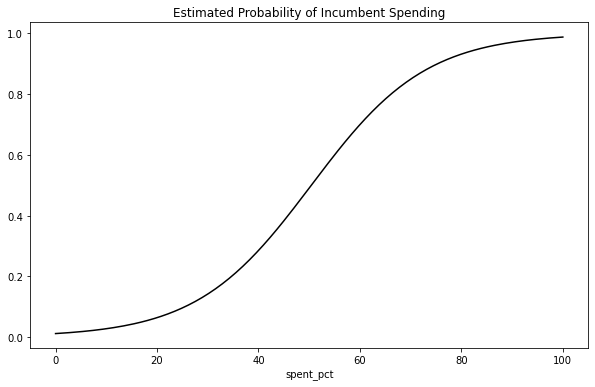

In [155]:
fit_df = pd.DataFrame({
    'spent_pct': np.linspace(start = clr['spent_pct'].min(),
                            stop = clr['spent_pct'].max(),
                            num = 150)
})

fit_df['fit'] = winner_spending.predict(fit_df)

fit_df.plot(x = 'spent_pct',
             y = 'fit',
             legend = False,
             figsize = (10,6),
             color = 'black',
            title = 'Estimated Probability of Incumbent Spending');

In [156]:
# Calculate most likely outcome, odds ratio and log odds
explanatory_data = clr[["spent_pct"]]

prediction_data = explanatory_data.assign(Winner_Status = winner_spending.predict(explanatory_data))
prediction_data["most_likely_outcome"] = np.round(prediction_data["Winner_Status"])
prediction_data["odds_ratio"] = prediction_data["Winner_Status"] / (1 - prediction_data["Winner_Status"])
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])
prediction_data

,spent_pct,Winner_Status,most_likely_outcome,odds_ratio,log_odds_ratio
0,95.925703,0.982240,1.0,55.305499,4.012872
1,4.074297,0.016496,0.0,0.016772,-4.088018
2,92.281307,0.975671,1.0,40.103062,3.691453
3,7.718693,0.022608,0.0,0.023131,-3.766598
4,96.747133,0.983460,1.0,59.460894,4.085319
...,...,...,...,...,...
888,87.663451,0.963882,1.0,26.687041,3.284178
889,12.336549,0.033591,0.0,0.034759,-3.359323
890,95.857821,0.982135,1.0,54.975382,4.006885
891,4.142179,0.016593,0.0,0.016873,-4.082031


In [157]:
# Confusion matrix lists number of true/false positives and negatives
conf_matrix = winner_spending.pred_table()
print(conf_matrix)

[[327.  52.]
 [ 50. 382.]]


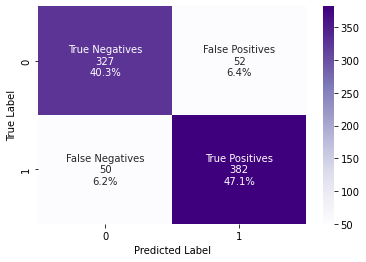

In [170]:
ax=plt.subplot()
group_names = ['True Negatives','False Positives','False Negatives','True Positives']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.1%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Purples')
ax.set_xlabel('Predicted Label');ax.set_ylabel('True Label');

In [159]:
# This formula calculates the proportion of correct predictions
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

accuracy = (TN + TP) / (TN + TP + FN + FP)
print(accuracy)

0.87422934648582


In [175]:
# Combine incumbent status and winners
incumbent_winners = smf.logit('Winner_Status ~ spent_pct + Incumbent_Status', data = clr).fit()

Optimization terminated successfully.
         Current function value: 0.197546
         Iterations 8


In [176]:
incumbent_winners.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Winner_Status   No. Observations:                  811
Model:                          Logit   Df Residuals:                      808
Method:                           MLE   Df Model:                            2
Date:                Mon, 17 Oct 2022   Pseudo R-squ.:                  0.7141
Time:                        16:24:17   Log-Likelihood:                -160.21
converged:                       True   LL-Null:                       -560.41
Covariance Type:            nonrobust   LLR p-value:                1.569e-174
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.2786      0.345    -12.408      0.000      -4.954      -3.603
spent_pct            0.0613      0.006     10.048      0.000       0.049       0.073
Incumbent_Status     3.1368      0.339      9.250      0.000       2.472       3.801
====================================================================================
"""

In [173]:
conf_matrix2 = incumbent_winners.pred_table()
print(conf_matrix2)

[[356.  23.]
 [ 34. 398.]]


In [174]:
TN2 = conf_matrix2[0,0]
TP2 = conf_matrix2[1,1]
FN2 = conf_matrix2[1,0]
FP2 = conf_matrix2[0,1]

accuracy2 = (TN2 + TP2) / (TN2 + TP2 + FN2 + FP2)
print(accuracy2)

0.9297163995067818


In [177]:
# With interaction
incumbent_winners_int = smf.logit('Winner_Status ~ spent_pct * Incumbent_Status ', data = clr).fit()

Optimization terminated successfully.
         Current function value: 0.196774
         Iterations 8


In [178]:
incumbent_winners_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Winner_Status   No. Observations:                  811
Model:                          Logit   Df Residuals:                      807
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Oct 2022   Pseudo R-squ.:                  0.7152
Time:                        16:24:55   Log-Likelihood:                -159.58
converged:                       True   LL-Null:                       -560.41
Covariance Type:            nonrobust   LLR p-value:                1.897e-173
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -4.4679      0.400    -11.159      0.000      -5.253      -3.683
spent_pct                      0.0652      0.007      8.929      0.000       0.051       0.079
Incumbent_Status               4.0687      0.906      4.489      0.000       2.292       5.845
spent_pct:Incumbent_Status    -0.0160      0.014     -1.133      0.257      -0.044       0.012
==============================================================================================
"""